In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:

import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib as mpl
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from datetime import time,timedelta,datetime,date
import pickle








Para poder hacer el clustering primero habr√° que extraer los dataframe de cada uno de los ficheros que contienen las series temporales.

In [10]:
directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'

mySeries = []
namesofMySeries = []
counter=0
dataframes_list=[]
singleSerie=[]

for filename in os.listdir(directory):

    if filename.endswith(".csv") and filename!='datAxes.csv' :
      df = pd.read_csv(directory+"/"+filename)
      df = df.loc[:,["ocupacion"]]  #cojo la columna indicada
     
      
      dim=len(df.to_numpy()) #calculamos la longitud del dataframe

  
      check=list(df.to_numpy().reshape(dim)[:287])
      mySeries.append(check)  #conseguimos una lista que hemos redimensionado a 1 dimensi√≥n y hemos hecho que tenga longitud 287
      singleSerie.extend(list(df.to_numpy().reshape(dim)[:287]))
      if dim<287:
        print(filename+' '+ str(dim))
      
      
      




      namesofMySeries.append(filename)
      counter+=1
ninety=int(len(singleSerie)*0.9)
train=singleSerie[:ninety]
valit=singleSerie[ninety:]

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcupTrT.pkl', 'wb') as file:
        pickle.dump(train, file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcupValit.pkl', 'wb') as file:
        pickle.dump(valit, file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/mySeriesOcup.pkl', 'wb') as file:
        pickle.dump(mySeries, file)

with open('/content/gdrive/MyDrive/PatronesComportamiento/singleSerieOcup.pkl', 'wb') as file:
        pickle.dump(singleSerie, file)


print(singleSerie[:30])

[0.07657658, 0.08962264, 0.1132075, 0.09433962, 0.08490566, 0.0990566, 0.1933962, 0.03773585, 0.03773585, 0.05660377, 0.03301887, 0.05188679, 0.1179245, 0.06132076, 0.1037736, 0.08490566, 0.1462264, 0.04245283, 0.09433962, 0.03773585, 0.0754717, 0.03773585, 0.1650943, 0.01886792, 0.01415094, 0.0990566, 0.04245283, 0.04245283, 0.07075471, 0.04716981]


Ahora hacemos el clustering, k es el n√∫mero de cl√∫sters que vamos a querer utilizar.

In [ ]:
k=6
kmeans = KMeans(n_clusters=k, random_state=50)
y_pred = kmeans.fit(mySeries).predict(mySeries)
print(y_pred)
print(kmeans.cluster_centers_)


[1 4 3 4 1 4 4 0 0 4 5 4 4 1 3 4 4 0 2 5 5 0 4 4 0 3 1 1 3 5 3 2 0 0 4 4 4
 2 0 4 1 0 3 4 1 4 4 4 2 3 4 0 4 2 1 4 4 4 2 2 2 4 1 1 0 0 0 5 4 5 0 4 3 2
 2 2 4 4 1 2 4 4 1 0 4 1 1 0 4 4 4 5 1 4 0 1 3 0 2 0 2 4 4 3 0 4 3 3 1 0 4
 4 1 3 0 2 4 4 2 1 5 2 2 0 3 3 1 5 2 1 0 5 4 3 4 4 4 5 4 4 0 3 4 3 4 0 2 2
 0 4 4 2 2 2 2 4 3 4 4 0 4 4 1 0 5 4 4 1 3 1 5 1 4 3 0 4 2 4 2 1 2 0 4 5 2
 2 4 1 4 1 3 4 4 4 0 4 2 1 1 4 0 5 4 3 4 4 3 1 1 3 4 5 4 1 4 2 1 2 4 2 4 3
 4 1 4 4 1 1 4 0 4 2 2 4 3 3 0 0 1 4 3 4 5 2 4 3 3 0 0 3 2 0 4 4 0 2 4 4 4
 3 4 2 4 0 2 4 4 2 2 5 4 5 4 3 1 4 0 4 2 4 2 0 2 5 4 1 1 3 3 4 4 2 4 1 2 4
 3 0 4 0 2 1 2 4 2 2 4 4 2 2 3 4 1 2 1 4 5 3 1 0 4 2 5 2 4 4 1 4 1 4 0 1 0
 4 4 5 3 0 3 4 0 4 2 3 4 4 1 4 0 2 1 4 3 4 4 4 4 0 5 2 2 4 4 3 0 3 0 5 4 4
 2 4 4 1 2 0 4 4 4 4 3 5 1 1 2 3 0 0 2 3 2 0 3 3 1 4 4 4 4 2 1 4 4 4 1 3 2
 0 5 3 4 5 4 4 4 1 4 4 2 1 3 0 1 1 0 4 5 0 5 4 1 2 4 4 4 4 4 5 4 4 0 5 2 4
 2 4 0 2 2 4 4 5 4 4 2 4 5 4 4 4 2 4 1 3 0 0 4 0 1 1 4 4 3 4 3 4 2 0 1 0 0
 4 3 0 0 4 4 4 1 4 4 3 4 

Distancias al centro del cl√∫ster, como vemos en la celda superior y_pred da un array con el cluster al que pertenece cada serie seg√∫n la posici√≥n q.ue ocupa, es decir, si el primer elemento del array es un 2 quiere decir que la primera series pertenece al cl√∫ster 2. Adem√°s con kmeans.cluster_centers_ podemos conseguir las coordenada de cada centro

In [ ]:
dias_senalar=[]

for m in range(len(mySeries)):
  #para cada serie
  y=kmeans.cluster_centers_[y_pred[m]]; #sacar las coordenadas del cluster de la serie en posici√≥n m
  dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(mySeries[m], y)]))
  if dist >70:
    print("Cluster "+ str(y_pred[m]))
    dias_senalar.append(m)


    print("Distancia eucl√≠dea entre serie "+ str(m) + ' '+ namesofMySeries[m]+" y cl√∫ster " +str(y_pred[m])+":", dist)


Cluster 5
Distancia eucl√≠dea entre serie 91 evolucion_diaria_intensidad.2021.12.31.csv y cl√∫ster 5: 73.62574403462384
Cluster 0
Distancia eucl√≠dea entre serie 114 evolucion_diaria_intensidad.2021.02.13.csv y cl√∫ster 0: 81.20510907425819
Cluster 3
Distancia eucl√≠dea entre serie 141 evolucion_diaria_intensidad.2021.07.02.csv y cl√∫ster 3: 71.8630495373541
Cluster 2
Distancia eucl√≠dea entre serie 146 evolucion_diaria_intensidad.2021.02.07.csv y cl√∫ster 2: 85.89074050546242
Cluster 2
Distancia eucl√≠dea entre serie 147 evolucion_diaria_intensidad.2022.01.01.csv y cl√∫ster 2: 73.01161312229485
Cluster 2
Distancia eucl√≠dea entre serie 243 evolucion_diaria_intensidad.2021.02.06.csv y cl√∫ster 2: 76.22481632975881
Cluster 0
Distancia eucl√≠dea entre serie 254 evolucion_diaria_intensidad.2021.02.27.csv y cl√∫ster 0: 74.98523251204334
Cluster 2
Distancia eucl√≠dea entre serie 267 evolucion_diaria_intensidad.2021.01.24.csv y cl√∫ster 2: 80.24638065099987
Cluster 2
Distancia eucl√≠dea entr

Vamos a representar las series temporales en sus cl√∫sters, en azul se visualiza el centroide y el verde aquellas series que pese haber sido asignadas a ese cl√∫ster presentan una gran distancia al centroide de su cl√∫ster.

In [ ]:

directory = '/content/gdrive/MyDrive/PatronesComportamiento/Notebooks/intensOcupation'
def plot_data():
    for m in mySeries:
        plt.plot(m, color='r',)  #represenamos todas las series


def plot_centroids():
    fig, axs = plt.subplots(k,1,figsize=(25,25))  #creamos k subplots



    for m in range(len(mySeries)):

     
      axs[y_pred[m]].plot(mySeries[m],color='r')  #en rojo representamos la serie m en el cluster correspondiente

      axs[y_pred[m]].title.set_text("Cl√∫ster " + str(y_pred[m]))
    for m in range(len(kmeans.cluster_centers_)):
        axs[m].plot(kmeans.cluster_centers_[m], color='b',linewidth=3)  #ahora representamos el centroide
        df = pd.read_csv(directory+"/datAxes.csv")  #para poner el tiempo en el eje nos valemos de una serie que tiene columnas tiempo y valor
        df = df.loc[:,["time", "value"]]
        df = df.dropna()  # elimina las filas con valores nulos

        # Calcular los √≠ndices equitativos
        indices = [i for i in range(0, len(df), len(df)//10)]  #geneamos los √≠ndices equiespaciados en 10 partes

        # Establecer los valores de xticks
        xticks = [df.iloc[i]['time'] for i in indices]  #etiquetas

        axs[m].plot(df['time'], df['value'], alpha=0)
        axs[m].set_xticks(xticks)
    for m in dias_senalar:
        axs[y_pred[m]].plot(mySeries[m],color='g',linewidth=3)  #en verde representamos la serie m que presenta anomal√≠a



      


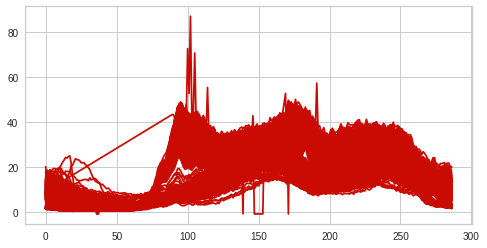

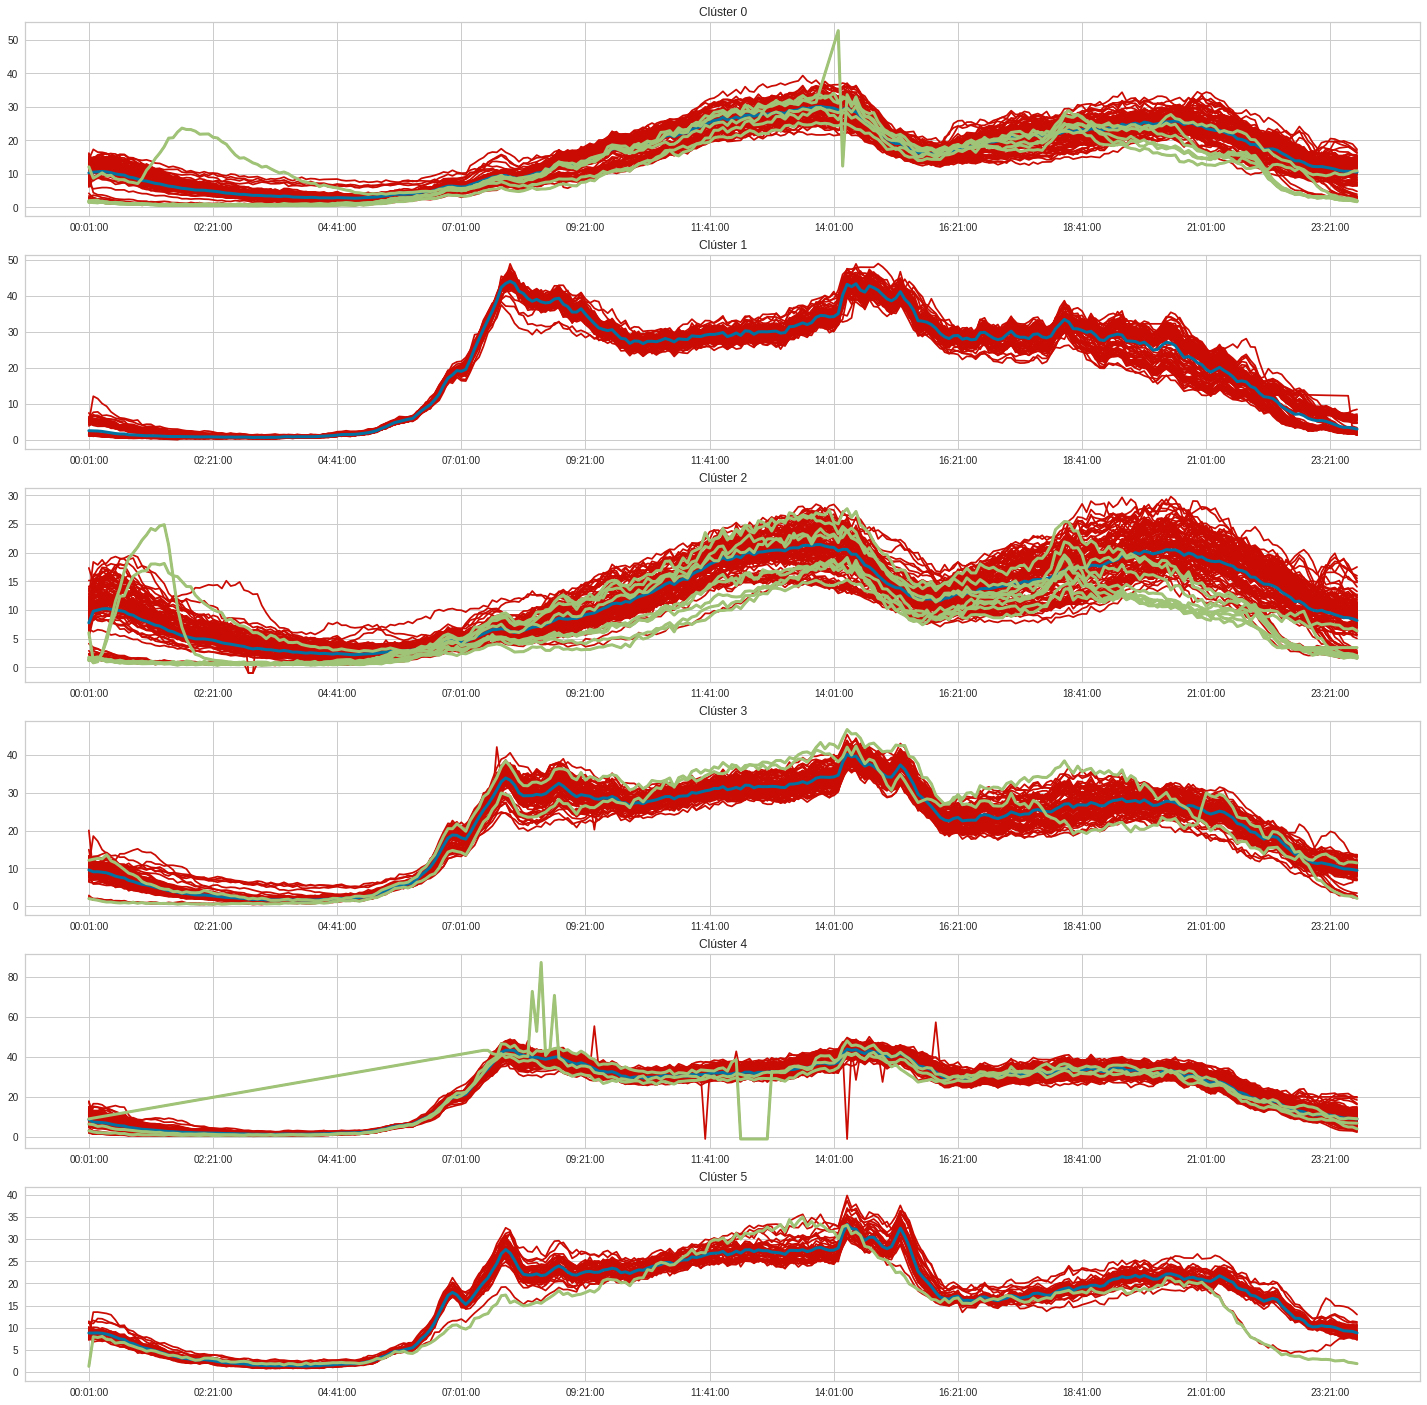

In [ ]:

plt.figure(figsize=(8, 4))
plot_data()
plot_centroids()
plt.show()


A continuaci√≥n se a√±aden algunas medidas para ayudar a determinar el n√∫mero √≥ptimo de cl√∫sters. En primer lugar calcularemos las intercias para distintos n√∫meros de cl√∫ster. Del 1 al 9.



In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(mySeries)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[8975780.744710421, 2423399.355112961, 1849356.1694605686, 1507495.3363742772, 1293278.5449651498, 1148127.8198171086, 1054098.039204025, 966905.0254427802, 889958.1911466178]


Seguidamente, probaremos el m√©todo de Elbow, en el que el n√∫mero √≥ptimo de cl√∫sters viene determinado por el punto de inflexi√≥n que se genera a partir de la representaci√≥n de las inercias con los distintos n√∫meros de cl√∫sters.

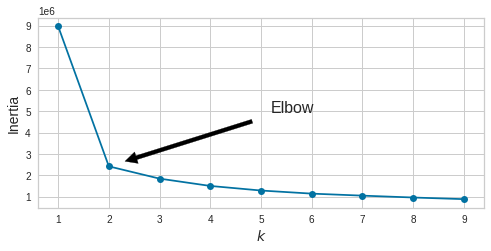

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()


Otra medida para determinar el n√∫mero de cl√∫sters es el silouette score. A mayor score mejor opci√≥n es. Es la media de los coeficientes de la silueta entre todas las instacias. El coeficinte de la silueta de una isntancia se calcula de la siguiente forma:
(ùëè‚àíùëé)/max(ùëé,ùëè)
donde ùëé es la distancia meda a otras instancias pertenencientes al mismo cl√∫ster y ùëè es la media de las distancias a las instancias al cl√∫ster m√°s cercano. El coeficiente de la silueta puede varias de -1 a +1: si el coeficiente est√° cercano a +1 quiere decir que la instancia est√° bien clasificada en su cl√∫ser y que est√° lejana al resto de cl√∫sters, mientras que si es cercano a 0 quiere decir que est√° cercano a una frontera de cl√∫ster, por √∫ltimo si es cercano a -1 quiere decir que se ha asignado a un cl√∫ster err√≥neo.






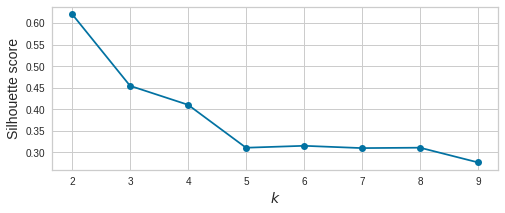

In [ ]:
silhouette_scores = [silhouette_score(mySeries, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()


Como vemos para nuestro modelo el mayor valor se consigue para 2 cl√∫sters.

Otra medida que podemos utilizar es el diagrama de la silueta, a partir de este diagrama podemos ver como de bien est√°n repartidos los cl√∫sters y si las instancias llegan al coeficiente de la silueta medio para ese n√∫mero de cl√∫sters o no. El n√∫mero de cl√∫sters √≥ptimo vendr√° definido por aquella representaci√≥n en la que al admitir un aumento en el n√∫mero de cl√∫sters se repartan mejor las instancias y todas lleguen al coeficiente de la silueta medio para esa k.

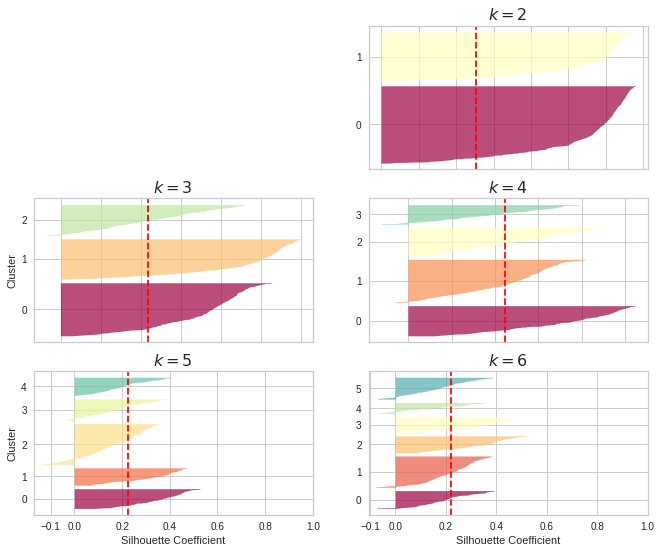

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2,3, 4,5,6):
    plt.subplot(3, 2, k )
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(mySeries, y_pred)

    padding = len(mySeries) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Para esta representaci√≥n vemos como para todos los n√∫mero de cl√∫sters expuestos las instancias superan el coeficiente de la silueta, para k m√°s peque√±as los conjuntos son muchos m√°s grandes y se ve que admiten m√°s diferenciaci√≥n.

Como √∫ltima medida a probar utilizaremos √≠ndice de Calinski-Harabasz. El √≠ndice Calinski-Harabasz se basa en la comparaci√≥n de la relaci√≥n ponderada entre la suma de los cuadrados (la medida de la separaci√≥n del cl√∫ster) y la suma de los cuadrados dentro del cl√∫ster (la medida de c√≥mo se empaquetan estrechamente los puntos dentro de un cl√∫ster). Idealmente, los cl√∫steres deben estar bien separados, por lo que la suma entre el valor de los cuadrados debe ser grande, pero los puntos dentro de un cl√∫ster deben estar lo m√°s cerca posible el uno del otro, dando como resultado valores m√°s peque√±os de la suma dentro del cl√∫ster de medida de cuadrados. Dado que el √≠ndice Calinski-Harabasz es una relaci√≥n, con la suma de los cuadrados entre el numerador y la suma de cuadrados dentro del denominador, las soluciones de cl√∫ster con valores m√°s grandes del √≠ndice corresponden a soluciones "mejores" que las soluciones de cl√∫ster con valores m√°s peque√±os.

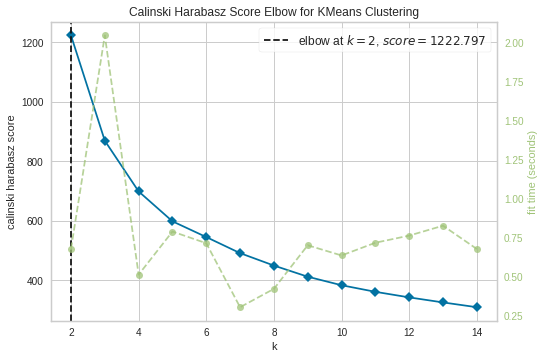

In [ ]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(mySeries)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Se obtiene el mayor valor para dos cl√∫sters. No obstante, todas estas medidas expuestas sirven para orientarnos no quiere decir qe vaya a ser la soluci√≥n definitiva. Adem√°s el n√∫mero de cl√∫sters tambi√©n va a depender de lo que queramos clasificar.

Vamos a recoger una lista los d√≠as de la semana que podemos encontrar para cada cl√∫ster.


In [ ]:
dic_dias={}
semana=['Lunes','Martes','Mi√©rcoles','Jueves','Viernes','S√°bado','Domingo']
for m in range(len(mySeries)):
  if y_pred[m] in dic_dias.keys():
    set_c=dic_dias[y_pred[m]]
    date_str=namesofMySeries[m].replace('.csv','').split('intensidad.')  #me quedo con la fecha del nombre

    date=datetime.strptime(date_str[1], "%Y.%m.%d")  #la parseo



    set_c.add(semana[date.weekday()])  #la a√±ado al set
    dic_dias[y_pred[m]]=set_c 
  else:
    set_ci=set()

    date_str=namesofMySeries[m].replace('.csv','').split('intensidad.')
    
    date=datetime.strptime(date_str[1], "%Y.%m.%d")

    


    set_ci.add(semana[date.weekday()])
    dic_dias[y_pred[m]]=set_ci
  
print(dic_dias)


683
{7: {'Martes', 'Jueves', 'Viernes', 'Mi√©rcoles', 'Lunes'}, 9: {'Jueves', 'Mi√©rcoles', 'Lunes', 'Martes'}, 1: {'Martes', 'Jueves', 'Viernes', 'Mi√©rcoles', 'Lunes'}, 6: {'S√°bado', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 0: {'Mi√©rcoles', 'Domingo', 'S√°bado', 'Lunes'}, 4: {'Mi√©rcoles', 'Martes', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 8: {'Jueves', 'Martes', 'Mi√©rcoles', 'Viernes'}, 2: {'S√°bado', 'Mi√©rcoles', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 3: {'S√°bado', 'Mi√©rcoles', 'Martes', 'Jueves', 'Viernes', 'Domingo', 'Lunes'}, 5: {'Martes', 'Jueves', 'Viernes', 'Mi√©rcoles', 'Lunes'}}


Como vemos, (depende de la k que utilicemos) pero para valores m√°s altos de k los cl√∫stering se epsecializan en fin de semana. No obstante, hay cl√∫sters que itegran hasta los 7 d√°is de la seman contra todo pron√≥stico, a√∫n siendo un valor alto de k. Hay veces que se engloba en d√≠as de tipo fin de semana el lunes y el viernes, esto es debdo a que en esos a√±os los puentes cayeron la mayor√≠a en lunes y viernes. Para los casos en los que un cl√∫ster engloba todo tipo de d√≠as de la semana podemos darle explicaci√≥n con etapas de vaciones, la entrada y salida de ni√±os en colegios tiene un impacto importante en estas series temporales y si est√°n de vaciones esos desplazamientos no se producen.
